In [7]:
#| cache: true
# Caching should be fine here
install.packages("aaltobda", repos = c("https://avehtari.github.io/BDA_course_Aalto/", getOption("repos")))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“unable to access index for repository https://avehtari.github.io/BDA_course_Aalto/src/contrib:
  cannot open URL 'https://avehtari.github.io/BDA_course_Aalto/src/contrib/PACKAGES'”
Warning message:
“package ‘aaltobda’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [1]:
library(aaltobda)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [9]:
library(latex2exp)
data("algae")
# The data are now stored in the variable `algae`.
# These are the values for the prior required in the assignment
prior_alpha = 2
prior_beta = 10

In [10]:
# Calculate the number of sites with algae ('1' indicates algae present)
n <- nrow(algae)  # Total number of sites
X <- sum(algae)   # Number of sites with algae present

# Posterior parameters
posterior_alpha <- prior_alpha + X
posterior_beta <- prior_beta + (n - X)

# Display the posterior parameters
posterior_alpha
posterior_beta

[1] 46

numeric(0)

In [11]:
# Create a sequence of theta values for plotting the posterior distribution
theta_values <- seq(0, 1, length.out = 1000)

# Compute the prior and posterior Beta densities
prior_density <- dbeta(theta_values, prior_alpha, prior_beta)
posterior_density <- dbeta(theta_values, posterior_alpha, posterior_beta)

# Plot the prior and posterior distributions
df <- data.frame(
  theta = theta_values,
  Prior = prior_density,
  Posterior = posterior_density
)

ggplot(df, aes(x = theta)) +
  geom_line(aes(y = Prior), color = "blue", size = 1, linetype = "dashed") +
  geom_line(aes(y = Posterior), color = "red", size = 1) +
  labs(
    title = "Prior and Posterior Distributions for Algae Presence",
    x = TeX("$\\theta$ (Probability of algae presence)"),
    y = "Density"
  ) +
  theme_minimal() +
  scale_y_continuous(expand = c(0, 0))

ERROR: Error in data.frame(theta = theta_values, Prior = prior_density, Posterior = posterior_density): arguments imply differing number of rows: 1000, 0


In [12]:
alpha <- 46
beta <- 240

lower_bound <- qbeta(0.90, alpha, beta)  # Lower 2.5% quantile
upper_bound <- qbeta(0.10, alpha, beta)  # Upper 97.5% quantile
# Print the credible interval
c(lower_bound, upper_bound)

[1] 0.1891245 0.1335744

In [13]:
theta_0 <- 0.2
# Compute P(θ ≤ 0.2 | y) using the CDF of the Beta distribution
posterior_prob <- pbeta(theta_0, alpha, beta)

posterior_prob

[1] 0.9586136

In [14]:
alpha <- 46
beta <- 240
theta_0 <- 0.2

# Compute P(θ ≤ 0.2 | y) using the CDF of the Beta distribution
posterior_prob <- pbeta(theta_0, alpha, beta)

posterior_prob


[1] 0.9586136

In [20]:
alpha<- 45
beta<- 231
lower_bound <- qbeta(0.90, alpha, beta)  
upper_bound <- qbeta(0.10, alpha, beta)  
# Print the credible interval
c(lower_bound, upper_bound)

[1] 0.1919971 0.1351407

In [19]:
alpha <- 45
beta <- 231

# Calculate the lower bound of the 90% credible interval
lower_bound_90 <- qbeta(0.90, alpha, beta)

lower_bound_90

[1] 0.1919971

In [21]:
alpha <- 45
beta <- 231

# Calculate the lower bound of the 90% credible interval
lower_bound_90 <- qbeta(0.05, alpha, beta)

lower_bound_90

[1] 0.1279681

In [22]:
alpha <- 45
beta <- 231
theta_0 <- 0.2

# Compute P(θ ≤ 0.2 | y) using the CDF of the Beta distribution
posterior_prob <- pbeta(theta_0, alpha, beta)

posterior_prob

[1] 0.9461411

In [27]:
alpha <- 45.5
beta <- 230.5

lower_bound <- qbeta(0.10, alpha, beta)  
upper_bound <- qbeta(0.90, alpha, beta)  
# Print the credible interval
c(lower_bound, upper_bound)

[1] 0.1368219 0.1939335

In [28]:
# Compute P(θ ≤ 0.2 | y) using the CDF of the Beta distribution
posterior_prob <- pbeta(theta_0, alpha, beta)

posterior_prob

[1] 0.9368863

In [29]:
alpha <- 144
beta <- 232

lower_bound <- qbeta(0.90, alpha, beta)  
upper_bound <- qbeta(0.10, alpha, beta)  
# Print the credible interval
c(lower_bound, upper_bound)

[1] 0.4152235 0.3510015

In [30]:
posterior_prob <- pbeta(theta_0, alpha, beta)

posterior_prob

[1] 1.863998e-16

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


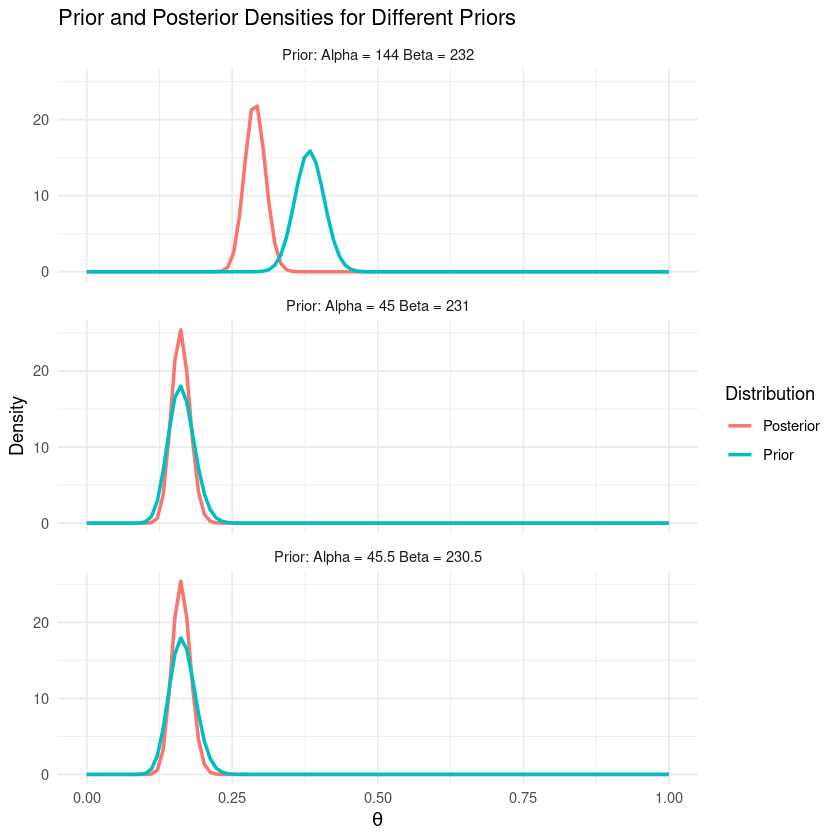

In [32]:
# Beta distribution density function
beta_density <- function(x, shape1, shape2) {
  dbeta(x, shape1, shape2)
}

# Binomial likelihood density function
binomial_likelihood <- function(x, n, k) {
  choose(n, k) * x^k * (1 - x)^(n - k)
}

# Parameters for the Beta prior distributions
priors <- list(c(45, 231), c(45.5, 230.5), c(144, 232)) # Define three different priors here priors, (alpha, beta)

# Parameters for the binomial likelihood (number of trials and successes)
n <- 274 # number of trials
k <-  44 # number of successes

# Create a sequence of x values from 0 to 1
x <- seq(0, 1, length.out = 100)


# Create a data frame with densities
densities_list <- lapply(priors, function(prior) {
  alpha_prior <- prior[1]
  beta_prior <- prior[2]
  alpha_posterior <- alpha_prior + k
  beta_posterior <- beta_prior + n - k
  
  data.frame(
    x = rep(x, 2),
    density = c(beta_density(x, alpha_prior, beta_prior),
                beta_density(x, alpha_posterior, beta_posterior)),
    distribution = factor(rep(c("Prior", "Posterior"), each = length(x))),
    prior = paste("Prior: Alpha =", alpha_prior, "Beta =", beta_prior)
  )
})

df <- bind_rows(densities_list)

# Plot the densities using ggplot2
ggplot(df, aes(x = x, y = density, color = distribution)) +
  geom_line(size = 1) +
  facet_wrap(~ prior, scales = "fixed", nrow = 3) +
  labs(title = "Prior and Posterior Densities for Different Priors", 
       x = TeX("$\\theta$"), 
       y = "Density", 
       color = "Distribution") +
  theme_minimal()

In [37]:
library(ggplot2)
library(dplyr)
library(latex2exp)
library(aaltobda)

In [38]:
# Beta distribution density function
beta_density <- function(x, shape1, shape2) {
  dbeta(x, shape1, shape2)
}

# Binomial likelihood density function
binomial_likelihood <- function(x, n, k) {
  choose(n, k) * x^k * (1 - x)^(n - k)
}

# Parameters for the Beta prior distributions
priors <- list(c(45, 231), c(45.5, 230.5), c(144, 232)) # Define three different priors here priors, (alpha, beta)

# Parameters for the binomial likelihood (number of trials and successes)
n <- 274 # number of trials
k <-  44 # number of successes

# Create a sequence of x values from 0 to 1
x <- seq(0, 1, length.out = 100)


In [39]:
# Create a data frame with densities
densities_list <- lapply(priors, function(prior) {
  alpha_prior <- prior[1]
  beta_prior <- prior[2]
  alpha_posterior <- alpha_prior + k
  beta_posterior <- beta_prior + n - k
  
  # Create separate data frames for prior and posterior densities
  prior_df <- data.frame(
    x = x,
    density = beta_density(x, alpha_prior, beta_prior),
    distribution = "Prior",
    prior = paste("Alpha =", alpha_prior, "Beta =", beta_prior)
  )
  
  posterior_df <- data.frame(
    x = x,
    density = beta_density(x, alpha_posterior, beta_posterior),
    distribution = "Posterior",
    prior = paste("Alpha =", alpha_prior, "Beta =", beta_prior)
  )

ERROR: Error in parse(text = x, srcfile = src): <text>:22:0: unexpected end of input
20:     prior = paste("Alpha =", alpha_prior, "Beta =", beta_prior)
21:   )
   ^



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


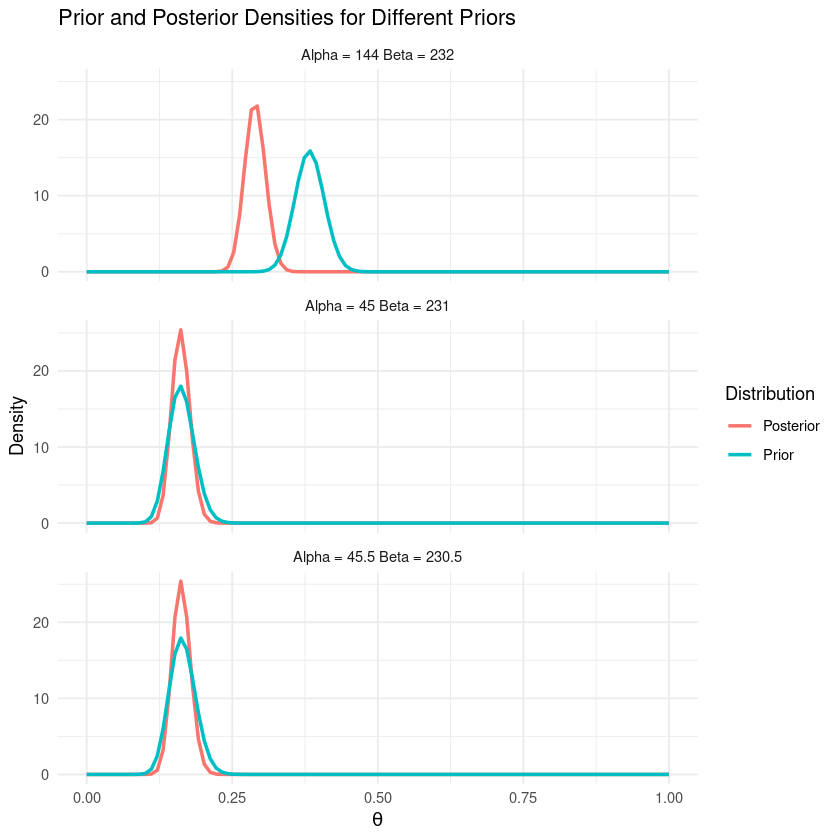

In [1]:
library(ggplot2)
library(dplyr)
library(latex2exp)
library(aaltobda)

# Beta distribution density function
beta_density <- function(x, shape1, shape2) {
  dbeta(x, shape1, shape2)
}

# Binomial likelihood density function
binomial_likelihood <- function(x, n, k) {
  choose(n, k) * x^k * (1 - x)^(n - k)
}

# Parameters for the Beta prior distributions
priors <- list(c(45, 231), c(45.5, 230.5), c(144, 232)) # Define three different priors here priors, (alpha, beta)

# Parameters for the binomial likelihood (number of trials and successes)
n <- 274 # number of trials
k <-  44 # number of successes

# Create a sequence of x values from 0 to 1
x <- seq(0, 1, length.out = 100)

# Create a data frame with densities
densities_list <- lapply(priors, function(prior) {
  alpha_prior <- prior[1]
  beta_prior <- prior[2]
  alpha_posterior <- alpha_prior + k
  beta_posterior <- beta_prior + n - k
  
  # Create separate data frames for prior and posterior densities
  prior_df <- data.frame(
    x = x,
    density = beta_density(x, alpha_prior, beta_prior),
    distribution = "Prior",
    prior = paste("Alpha =", alpha_prior, "Beta =", beta_prior)
  )
  
  posterior_df <- data.frame(
    x = x,
    density = beta_density(x, alpha_posterior, beta_posterior),
    distribution = "Posterior",
    prior = paste("Alpha =", alpha_prior, "Beta =", beta_prior)
  )
  
  # Combine prior and posterior data frames
  rbind(prior_df, posterior_df)
})

df <- bind_rows(densities_list)

# Plot the densities using ggplot2
ggplot(df, aes(x = x, y = density, color = distribution)) +
  geom_line(size = 1) +
  facet_wrap(~ prior, scales = "fixed", nrow = 3) +
  labs(title = "Prior and Posterior Densities for Different Priors", 
       x = TeX("$\\theta$"), 
       y = "Density", 
       color = "Distribution") +
  theme_minimal()
